<a href="https://colab.research.google.com/github/jeyakumar-nanc/MachineLearning/blob/main/Logistic_Regression_and_SVMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0). 
The total score must be re-scaled to 100 -- that should apply to all future assignments so that Canvas assigns the same weight on all assignments. 



In [ ]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0


# **Assignment 3**

The goal in this assignment to work a little more with Python, do some practice with logistic regression, reflect on how it can fail to work on linearly separable data. You will also work with a support vector classifier. All that, still on "toy" data sets. 

We will work with the first 'real' data sets in the next assignment. 

## **Preparation Steps**

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [ ]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


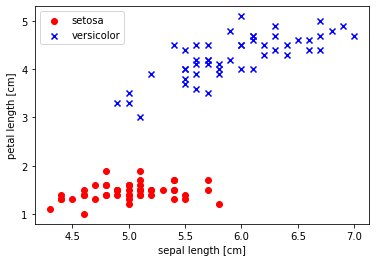

In [ ]:
# select setosa and versicolor for binary classification
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [ ]:
# function for visualizing decision regions

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
  
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 1. Practice with logistic regression** </font>

Let's first load the textbook's implementation of logistic regression with gradient descent.

In [ ]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # compute the logistic `loss` 
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.loss_.append(loss)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Below you can see the first 3 data points of the data set, all labeled as 'setosa'. Let's set the numerical value for 'setosa' to 1. (i.e. y = 1). 

In [ ]:
X[0:3]


array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])


Suppose the initial weights of the logistic neuron are w0=0.1, w1=-0.2, w2=0.1

<font color = 'blue'> **Q1-1**.  </font> Write the weights after processing data points 0,1,2, with $\eta=0.1$ and show your calculations. This is similar to the previous assignment, only done now for the logistic neuron. You can also use *LogisticRegressionGD* to check your calculations. <br>

<font color = 'blue'> **Q1-2**.  </font> Given our data $X$, let $X_{d=2}$ and $X_{d=3}$ be the quadratic and cubic features. Using code from the notebook on polynomial regression, generate $X_{d=2}$ and $X_{d=3}$

<font color = 'blue'> **Q1-3**.  </font> Using *LogisticRegressionGD* fit $X$, $X_{d=2}$ and $X_{d=3}$. Here you should set $\eta = 0.1$ and $n_{iter}>1000$. For each of these three cases, report the loss function value for the model computed by *LogisticRegressionGD*.
Here it is expected that the loss value decreases as $d$ increases. 


In [ ]:
#Q1-1. Write the weights after processing data points 0,1,2, with  η=0.1  and show your calculations. 
#This is similar to the previous assignment, only done now for the logistic neuron. 
#You can also use LogisticRegressionGD to check your calculations.
# your calculations and code go here
x_sample = X[0:3]
#print(x_sample)
y_sample = np.ones([1,3]).reshape(x_sample.shape[0],1)
#print(y_sample)
eta = 0.1
w = np.array([0.1,-0.2,0.1])

#y_init = -1
for i, item in enumerate(x_sample):  
 
  net_input = np.dot(item, w[1:]) + w[0]
  output = 1. / (1. + np.exp(-np.clip(net_input, -250, 250))) #sigmoid activation function
  errors = (y_sample[i] - output)
  w[1:] += eta * x_sample[i].T*(errors)
  w[0] += eta * errors.sum()
  print(w)


[0.16856801 0.14969686 0.19599522]
[0.19213665 0.26518321 0.22899132]
[0.20711645 0.33558826 0.24846505]


In [ ]:
#Q1-2. Given our data  X , let  Xd=2  and  Xd=3  be the quadratic and cubic features.
# Using code from the notebook on polynomial regression, generate  Xd=2  and  Xd=3

from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

X_quad = quadratic.fit_transform(X)
print("****x quad****")
#print(X_quad)
print(X_quad.shape)

X_cubic = cubic.fit_transform(X)
print("****x cubic****")
#print(X_cubic)
print(X_cubic.shape)

****x quad****
(100, 6)
****x cubic****
(100, 10)


In [ ]:
##Q1-3. Using LogisticRegressionGD fit  X ,  Xd=2  and  Xd=3 . Here you should set  η=0.1  and  niter>1000 . 
#For each of these three cases, report the loss function value for the model computed by LogisticRegressionGD.
# Here it is expected that the loss value decreases as  d  increases.
_iter =1001
_eta = 0.00001
lgr = LogisticRegressionGD(_eta,_iter)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
#y = np.ones(X.shape[0])*1

lgr_lnr = lgr.fit(X, y)
y_lin_fit = lgr_lnr.predict(X)
print(f"linear - {lgr_lnr.loss_}")

lgr_quad = lgr.fit(X_quad, y)
y_quad_fit = lgr_quad.predict(quadratic.fit_transform(X))
print(f"quadratic - {lgr_quad.loss_}")

lgr_cubic = lgr.fit(X_cubic, y)
y_cubic_fit = lgr_cubic.predict(cubic.fit_transform(X))
print(f"cubic - {lgr_cubic.loss_}")

linear - [68.73506119844845, 68.21798308429935, 67.70896027940486, 67.20782924133975, 66.71442921898117, 66.22860224971635, 65.7501931533134, 65.27904952267494, 64.81502171168657, 64.35796282036472, 63.90772867750062, 63.4641778209897, 63.02717147602749, 62.596573531345776, 62.17225051365468, 61.75407156044914, 61.34190839133016, 60.935635277984346, 60.53512901295772, 60.14026887735254, 59.750936607569415, 59.367016361209764, 58.988394682247495, 58.61496046557219, 58.24660492100034, 57.883221536844765, 57.52470604312718, 57.17095637451317, 56.821872633043604, 56.47735705073154, 56.13731395208901, 55.801649716643276, 55.47027274149808, 55.14309340399084, 54.820024024493286, 54.500978829398946, 54.185873914337485, 53.87462720765251, 53.56715843417613, 53.26338907933088, 52.96324235358655, 52.66664315729663, 52.37351804593704, 52.08379519576702, 51.797404369930035, 51.51427688501037, 51.23434557805929, 50.95754477410273, 50.68381025414064, 50.413079223646804, 50.14529028157628, 49.8803833

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log


In [ ]:
# Grader's area

maxScore = maxScore +12
#M[1,1] = 
#M[1,2] = 
#M[1,3] =

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 2. A theoretical question** </font>

This question is about a theoretical explanation for what you observed in question 1(iii). 

<br>

Suppose $f_1$ is a model that optimally fits the data $(X,y)$, and $f_2$ is another model that optimally fits the data $(X_2,y)$ where $X_2$ are the quadratic features of $X$. Then the loss function value obtained by $f_2$ is **always** going to be at least equal to that for $f_1$. Try to come up with a solid mathematical argument that justifies this claim. [Note: as with anything else, feel free to discuss this on Canvas]

**Q2 Answer**

For linear with datapoints (x1,x2)

y_hat = w1.x1 + w2.x2 + b

loss = -y.log y_hat - (1-y)log(1-y_hat)

For quadratic with datapoints (x1,x2)

y_hat_quad = w1.x1 + w2.x2 + w3.x1_sqr + w4.x2_sqr + w5.x1.x2 + b

loss = -y.log y_hat_quad - (1-y)log(1-y_hat_quad)

When compared to linear, only number of features are increased in quadratic model.
If the weights w3, w4, w5 are minimal (or when <=0), loss function will be almost equal to linear model
i.e., 
y_hat_quad = w1.x1 + w2.x2 + b (where w3,w4,w5 <=0)
Computing loss with y_hat_quad will be same as the loss values obtained in linear model



In [ ]:
# Grader's area

maxScore = maxScore + 4
#M[2,1] = 


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 3. Logistic Regression Fail?**  </font>

Unlike the perceptron, logistic regression does **not** guarantee that the output will actually separate 2-label data points that are linearly separable. Construct a 2-dimensional data set (i.e. the data points and their labels), with the properties that: <br> 

**a.** the data set is linearly separable  <br>
**b.** the optimal logistic regression model does not separate the data.  <br>

Demonstrate your answer as follows: <br>

<font color = 'blue'> **Q3-1**.  </font>
 Plot the data points, as we did above for the iris data set. This will show that your data set is linearly separable. <br>
<font color = 'blue'> **Q3-2**.  </font> Calculate the optimal logistic neuron weights using the function *LogisticRegressionGD* from question 1. <br>
<font color = 'blue'> **Q3-3**. </font>  Find one point in your data set, and show the calculations that prove that it is misclassified by the optimal logistic neuron. 


**Hint**: Try small datasets.
**Note**: It's best to use fresh variables for your dataset, because the previous $X,y$ are re-used in question 4.


In [ ]:
# your answers go here
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Generating random datapoints (scale values obtained based on trials)
x_arange1 =  np.arange(2,3,0.02)
x_arange2 =  np.arange(2,3,0.02)
x_rand1 = x_arange1 +  np.random.rand(x_arange1.shape[0])
x_rand2 = x_arange2 + 6*np.random.rand(x_arange2.shape[0])+5 
x_new = np.vstack((np.column_stack((x_rand2,x_rand1)) ,np.column_stack((x_rand1,x_rand1))))
print(x_new.shape)
y_new = np.hstack((np.ones(45)*-1.0,np.ones(55)*1.0))

(100, 2)


(100, 2)


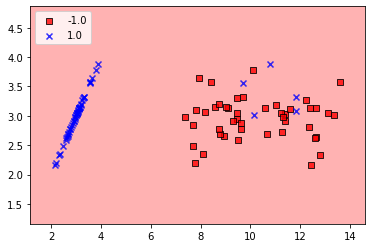

In [ ]:
#Q3-1. Plot the data points, as we did above for the iris data set. This will show that your data set is linearly separable.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    x_new, y_new, test_size=0.3, random_state=1, stratify=y_new)

sc = StandardScaler()
sc.fit(X_train_new)
X_train_std = sc.transform(X_train_new)
X_test_std = sc.transform(X_test_new)
X_combined_std = sc.transform(x_new)
lgr = LogisticRegressionGD(0.001,1000,random_state=1)
#y = np.ones(X.shape[0])*-1
lgr.fit(x_new, y_new)
print(X_combined_std.shape)
plot_decision_regions(X=x_new, y=y_new,classifier=lgr)
plt.legend(loc="upper left")

From the above plot we could see that logistic regression, could not plot the decision boundary correctly even though the data is seperable

In [ ]:
#Q3-2. Calculate the optimal logistic neuron weights using the function LogisticRegressionGD from question 1.
eta_test = 1
for i in range(100):
  eta_test = eta_test/10
  lgr = LogisticRegressionGD(eta_test,1000,random_state=1)
  lgr.fit(x_new, y_new)
  print(f"eta - {eta_test} , weights - {lgr.w_}")

eta - 0.1 , weights - [   995.11676069 -25573.12567367   3355.79922674]
eta - 0.01 , weights - [   99.52629517 -2557.31807319   335.57516911]
eta - 0.001 , weights - [   9.95572133 -255.77131916   33.51962956]
eta - 0.0001 , weights - [  0.97414508 -25.72857304   3.24108018]
eta - 1e-05 , weights - [ 0.0752737  -2.73262563  0.21100639]
eta - 1.0000000000000002e-06 , weights - [ 0.00274309 -0.38019539 -0.04168728]
eta - 1.0000000000000002e-07 , weights - [ 0.01283402 -0.05972276 -0.01512867]
eta - 1.0000000000000002e-08 , weights - [ 0.01585874 -0.01185646 -0.00639835]
eta - 1.0000000000000003e-09 , weights - [ 0.01620451 -0.00669554 -0.0053948 ]
eta - 1.0000000000000003e-10 , weights - [ 0.01623955 -0.0061754  -0.00529304]
eta - 1.0000000000000003e-11 , weights - [ 0.01624306 -0.00612335 -0.00528285]
eta - 1.0000000000000002e-12 , weights - [ 0.01624341 -0.00611814 -0.00528183]
eta - 1.0000000000000002e-13 , weights - [ 0.01624345 -0.00611762 -0.00528173]
eta - 1.0000000000000002e-14 ,

From the above results we could see after certain iteration, weight vectors remains the same, so the optimal weights are [ 0.01624345 -0.00611756 -0.00528172]

In [ ]:
#Q3-3. Find one point in your data set, and show the calculations that prove that it is misclassified by the optimal logistic neuron.
lgr = LogisticRegressionGD(0.00001,1000,random_state=1)
#y = np.ones(X.shape[0])*-1
lgr.fit(x_new[40:100], y_new[40:100])
print("Predictions from LogisticRegressionGD method..")
print(lgr.predict(x_new[40:100]))

print("Predictions from manual calc using the weights computed above..")
w = [ 0.01624345, -0.00611756] #weights from above calc
y_new_predicted =  np.dot(w,np.transpose(x_new[40:100]))
y_new_hat = np.where(y_new_predicted >= 0,1,-1)
#print(y_new_predicted)
print(y_new_hat)

print("From the above two predictions, we can see few data points were misclassified..")


Predictions from LogisticRegressionGD method..
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predictions from manual calc using the weights computed above..
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
From the above two predictions, we can see few data points were misclassified..


In [ ]:
# Grader's area

maxScore = maxScore + 12
#M[3,1] = 
#M[3,2] = 
#M[3,3] = 


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 4. SVM and margin classification**  </font>

The Iris dataset defined in above cells is linearly separable. 

<font color = 'blue'> **Q4-1.**  </font> Use a [linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) to learn a hyperplane $y=w_1x_1 +w_2x_2 +b$ that maximizes the margin for this Iris dataset. In your answer, specify a setting for the hyperparameter $C$ that reduces the amount of regularization, i.e. it incentivizes small slacks. 

<font color = 'blue'> **Q4-2.** </font> Calculate the margin for the hyperplane you computed above.  [Hint: Read the documentation in order to access the coefficients, and then use these coefficients to calculate the margin]

**Note:** as with anything else, feel free to discuss this on Canvas.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
#svm = SGDClassifier(loss='hinge')

In [ ]:
for i in range(1,100):
  c = i+1
  #Q4-1. Use a linear SVC to learn a hyperplane y=w1x1+w2x2+b that maximizes the margin for this Iris dataset.
  print(f"Linear SVC in Iris dataset with hyper parameter C: {c}")
  X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15) 
  clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5,C=c,loss='hinge'))
  clf.fit(X, y)
  coef_ = clf.named_steps['linearsvc'].coef_
  #print(clf.named_steps['linearsvc'].coef_)
  print(f"Coefficient: {coef_}")
  print(f"Intercept: {clf.named_steps['linearsvc'].intercept_}")
  # calculate margin
  print(f"Margin: {2.0 /np.sqrt(np.sum(coef_ ** 2)) }\n")  #Q4-2. Calculate the margin for the hyperplane
 




Linear SVC in Iris dataset with hyper parameter C: 2
Coefficient: [[1.32982216e-05 2.05900786e+00]]
Intercept: [0.37429469]
Margin: 0.9713416037519628

Linear SVC in Iris dataset with hyper parameter C: 3
Coefficient: [[1.58871169e-05 2.05900895e+00]]
Intercept: [0.37430498]
Margin: 0.9713410898378632

Linear SVC in Iris dataset with hyper parameter C: 4
Coefficient: [[1.69204009e-05 2.57368328e+00]]
Intercept: [0.71781818]
Margin: 0.7770963962218095

Linear SVC in Iris dataset with hyper parameter C: 5
Coefficient: [[1.25979248e-05 2.62054924e+00]]
Intercept: [0.74909642]
Margin: 0.763198786730314

Linear SVC in Iris dataset with hyper parameter C: 6
Coefficient: [[1.25979248e-05 2.62054924e+00]]
Intercept: [0.74909642]
Margin: 0.763198786730314

Linear SVC in Iris dataset with hyper parameter C: 7
Coefficient: [[1.25979248e-05 2.62054924e+00]]
Intercept: [0.74909642]
Margin: 0.763198786730314

Linear SVC in Iris dataset with hyper parameter C: 8
Coefficient: [[1.25979248e-05 2.620549

From the above computation we could see that as C increases, margin decreases. Margin is maximum when C=1

Linear SVC in Iris dataset with hyper parameter C: 1

Coefficient: [[-0.04266948  1.85548212]]

Intercept: [0.39797493]

Margin: 1.0776020681333847

In [ ]:
# Grader's area

maxScore = maxScore + 8
#M[4,1] = 
#M[4,2] = 
#M[4,3] = 


-----------------------
-----------------------
-----------------------


In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore